### Part 2 — Fashion MNIST CNN using PyTorch

### Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### Load Data

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

In [3]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.6MB/s]


In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

### Build Model

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
model = CNN()

### Define Loss and Optimizer

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Train Model

In [8]:
for epoch in range(10):
    running_loss = 0.0

    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

Epoch 1, Loss: 0.5452
Epoch 2, Loss: 0.3471
Epoch 3, Loss: 0.2943
Epoch 4, Loss: 0.2608
Epoch 5, Loss: 0.2350
Epoch 6, Loss: 0.2159
Epoch 7, Loss: 0.1968
Epoch 8, Loss: 0.1795
Epoch 9, Loss: 0.1641
Epoch 10, Loss: 0.1510


### Evaluate Model

In [9]:
correct = 0
total = 0

In [10]:
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [11]:
accuracy = correct / total
print('Test Accuracy:', round(accuracy*100, 2), '%')

Test Accuracy: 91.28 %


### Show Some Predictions

In [12]:
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, preds = torch.max(outputs, 1)

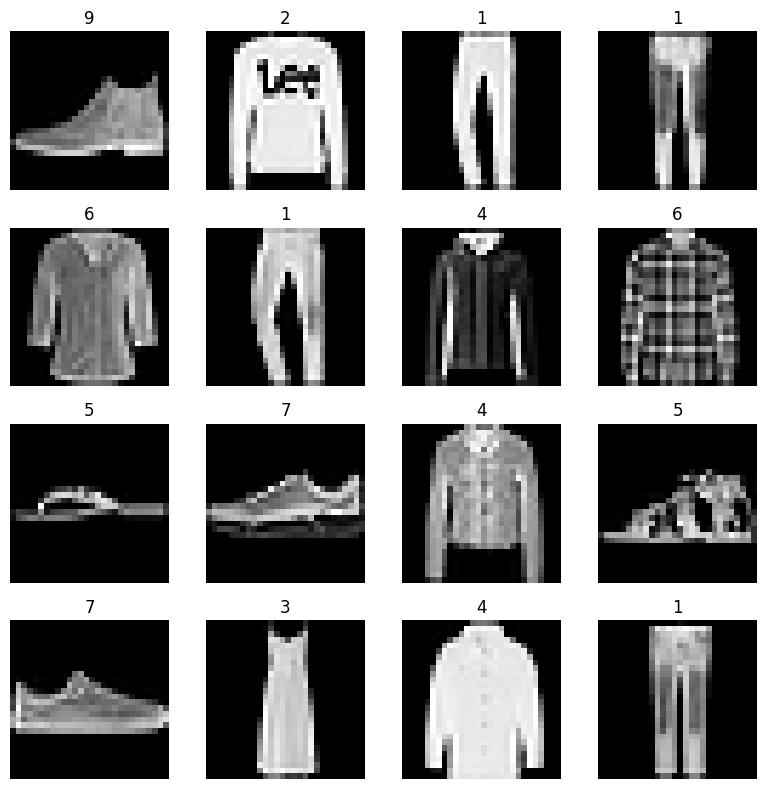

In [13]:
plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(preds[i].item())
    plt.axis('off')

plt.tight_layout()
plt.show()